# Plots

Create plots for visualizing benchmark results

In [83]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np


def plot_benchmarks(frameworks, times, title, description, out="plots/plot_benchmark.jpg"):
    gpu = ["gpu" in fr.lower() for fr in frameworks]
    #print(gpu)

    cpu = np.invert(gpu)
    #print(cpu)

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.bar(frameworks[cpu], times[cpu], color="#00a3f6")
    plt.bar_label(bars, fmt="%g ms")
    bars = ax.bar(frameworks[gpu], times[gpu], color="#76b900")
    plt.bar_label(bars, fmt="%g ms")

    plt.ylabel("Wall-Clock Time [ms]")
    plt.title(title)
    plt.ylim(0, 26)

    trans = mtrans.blended_transform_factory(fig.transFigure,
                                             mtrans.IdentityTransform())

    txt = fig.text(.5, 5, description, ha='center')

    ax.legend(['Intel Xeon E3-1230 v3', 'NVIDIA GTX 1080'])
    #ax.legend()

    txt.set_transform(trans)
    plt.savefig(out, dpi=200, bbox_inches='tight')
    plt.show()

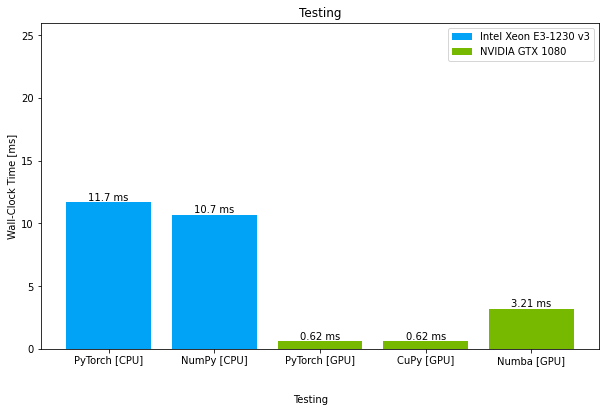

In [84]:
# Test plotting
f = np.array(["PyTorch [CPU]", "NumPy [CPU]", "PyTorch [GPU]", "CuPy [GPU]", "Numba [GPU]"])
t = np.array([11.7, 10.7, 0.62, 0.62, 3.21])

plot_benchmarks(f, t, "Testing", "Testing")

In [13]:
# Read actual benchmark results
import pandas as pd

df = pd.read_csv("data/wall-clock-times-float32.csv")
df

Framework  Wall-clock time
0  PyTorch [CPU]            11.70
1    NumPy [CPU]            10.70
2  PyTorch [GPU]             0.62
3    Numba [GPU]             1.75
4     CuPy [GPU]             0.62

In [14]:
# Read actual benchmark results
import pandas as pd

df_64 = pd.read_csv("data/wall-clock-times-float64.csv")
df_64

Framework  Wall-clock time [ms]
0  PyTorch [CPU]                 24.30
1    NumPy [CPU]                 17.50
2  PyTorch [GPU]                  9.13
3    Numba [GPU]                  6.59
4     CuPy [GPU]                  8.96

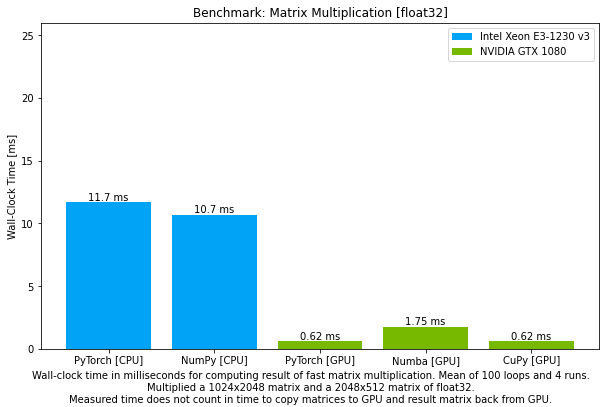

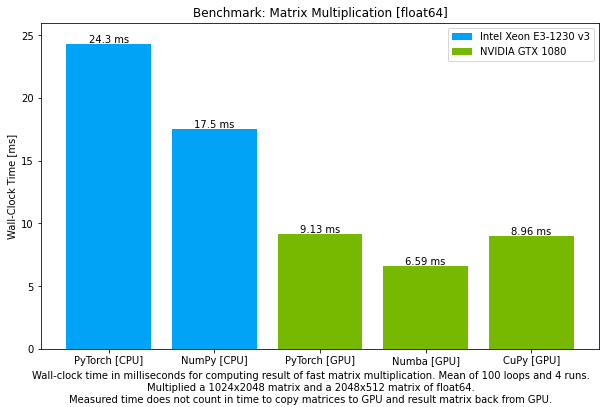

In [87]:
# Create plot
title = "Benchmark: Matrix Multiplication [float32]"
desc =  "Wall-clock time in milliseconds for computing result of fast matrix multiplication. Mean of 100 loops and 4 runs.\n" \
        "Multiplied a 1024x2048 matrix and a 2048x512 matrix of float32.\n" \
        "Measured time does not count in time to copy matrices to GPU and result matrix back from GPU."

plot_benchmarks(df.iloc[:, 0], df.iloc[:, 1], title, desc, out="plots/plot_benchmark-float32.jpg")


title_64 = title.replace("float32", "float64")
desc_64 =  desc.replace("float32", "float64")

plot_benchmarks(df_64.iloc[:, 0], df_64.iloc[:, 1], title_64, desc_64, out="plots/plot_benchmark-float64.jpg")

## Plot Matrix Sizes

In [1]:
# Read actual benchmark results
import pandas as pd

df_numpy = pd.read_csv("data/sizes-wall-clock-times-numpy.csv")
df_numpy

sizes        times
0      10     0.001996
1      20     0.002092
2      30     0.004345
3      40     0.006462
4      50     0.007581
5      60     0.010761
6      70     0.121555
7      80     0.103400
8      90     0.099490
9     100     0.102356
10    110     0.116651
11    120     0.115271
12    130     0.098666
13    140     0.116808
14    150     0.128876
15    160     0.121919
16    170     0.144412
17    180     0.151620
18    190     0.145325
19    200     0.146537
20    210     0.164554
21    220     0.180323
22    230     0.198859
23    240     0.229039
24    250     0.238658
25    260     0.208191
26    270     0.250484
27    280     0.285104
28    290     0.286777
29    300     0.358680
30    400     0.569139
31    500     1.143007
32    600     1.722022
33    700     2.598478
34    800     4.069871
35    900     6.018563
36   1000     8.848438
37   2000    58.669920
38   3000   171.562063
39   4000   389.902540
40   5000   725.742960
41   6000  1288.607117
42   7000  2082.337640
43   8000  2899.134950
44   9000  4158.156957
45  10000  5756.138503

In [2]:

df_cupy = pd.read_csv("data/sizes-wall-clock-times-cupy.csv")
df_cupy

sizes       times
0      10    0.177918
1      20    0.149136
2      30    0.151650
3      40    0.155275
4      50    0.155587
5      60    0.149213
6      70    0.153401
7      80    0.149266
8      90    0.153528
9     100    0.153665
10    110    0.162623
11    120    0.156255
12    130    0.158369
13    140    0.154190
14    150    0.155853
15    160    0.156091
16    170    0.157315
17    180    0.154237
18    190    0.155381
19    200    0.159492
20    210    0.155125
21    220    0.158684
22    230    0.163963
23    240    0.163975
24    250    0.167068
25    260    0.167863
26    270    0.169256
27    280    0.183276
28    290    0.201083
29    300    0.195509
30    400    0.212713
31    500    0.238082
32    600    0.330705
33    700    0.335321
34    800    0.373397
35    900    0.472220
36   1000    0.594185
37   2000    2.648038
38   3000    8.050967
39   4000   18.671576
40   5000   38.777737
41   6000   95.307055
42   7000  158.748571
43   8000  224.196138
44   9000  219.799360
45  10000  298.117840

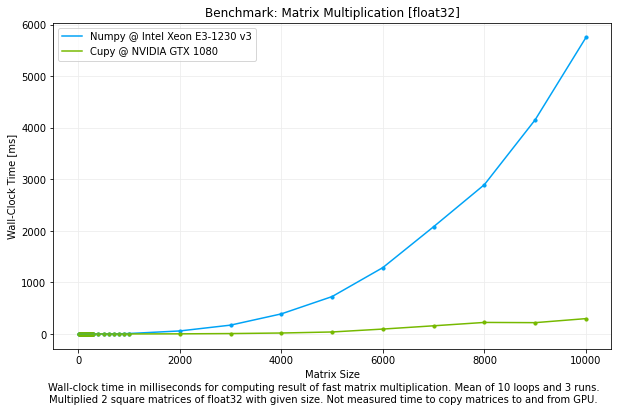

In [78]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

desc_sizes =  "Wall-clock time in milliseconds for computing result of fast matrix multiplication. Mean of 10 loops and 3 runs.\n" \
        "Multiplied 2 square matrices of float32 with given size. Not measured time to copy matrices to and from GPU."

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", label="Numpy @ Intel Xeon E3-1230 v3")
ax.scatter(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", s=10)
ax.plot(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", label="Cupy @ NVIDIA GTX 1080")
ax.scatter(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", s=10)

#plt.xscale('log')
#plt.yscale('log')

plt.ylabel("Wall-Clock Time [ms]")
plt.xlabel("Matrix Size")
plt.title("Benchmark: Matrix Multiplication [float32]")

trans = mtrans.blended_transform_factory(fig.transFigure,
                                         mtrans.IdentityTransform())

txt = fig.text(.5, 5, desc_sizes, ha='center')
txt.set_transform(trans)

ax.set_axisbelow(True) # draw grid behind scatter
ax.grid(c="#ededed")

ax.legend()

plt.savefig("plots/plot_benchmark-sizes.jpg", dpi=200, bbox_inches='tight')
plt.show()

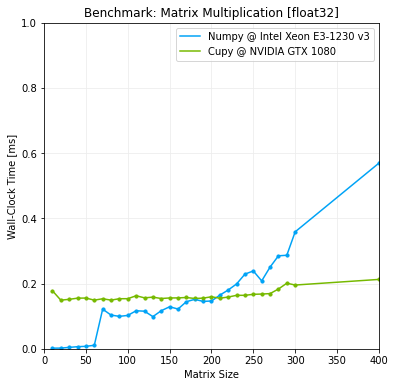

In [79]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", label="Numpy @ Intel Xeon E3-1230 v3")
ax.scatter(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", s=10)
ax.plot(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", label="Cupy @ NVIDIA GTX 1080")
ax.scatter(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", s=10)

#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0, 1)
plt.xlim(0, 400)

plt.ylabel("Wall-Clock Time [ms]")
plt.xlabel("Matrix Size")
plt.title("Benchmark: Matrix Multiplication [float32]")

trans = mtrans.blended_transform_factory(fig.transFigure,
                                         mtrans.IdentityTransform())

#txt = fig.text(.5, 5, desc_sizes, ha='center')
#txt.set_transform(trans)

ax.set_axisbelow(True) # draw grid behind scatter
ax.grid(c="#ededed")

ax.legend()

plt.savefig("plots/plot_benchmark-sizes-400.jpg", dpi=200, bbox_inches='tight')
plt.show()

## Plots for the Report

### Plot Python frameworks

In [29]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np


def plot_benchmark_report(frameworks, times, out="plots/plot_benchmark.jpg"):
    gpu = ["gpu" in fr.lower() for fr in frameworks]
    #print(gpu)

    cpu = np.invert(gpu)
    #print(cpu)

    fig, ax = plt.subplots(figsize=(8, 5))

    bars = ax.bar(frameworks[cpu], times[cpu], color="#00a3f6")
    plt.bar_label(bars, fmt="%g ms")
    bars = ax.bar(frameworks[gpu], times[gpu], color="#76b900")
    plt.bar_label(bars, fmt="%g ms")

    plt.ylabel("Wall-Clock Time [ms]")
    plt.ylim(0, 26)

    ax.legend(['Intel Xeon E3-1230 v3', 'NVIDIA GTX 1080'])
    #ax.legend()

    txt.set_transform(trans)
    plt.savefig(out, dpi=200, bbox_inches='tight')
    plt.show()

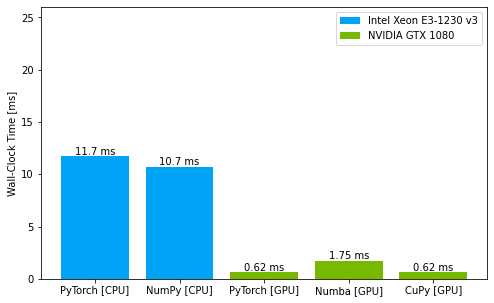

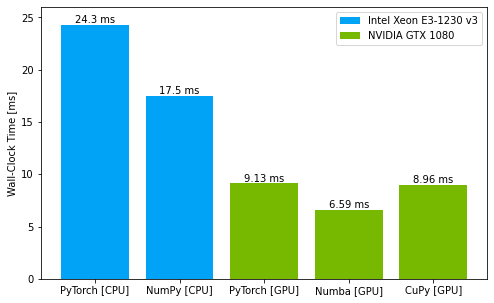

In [30]:
# Create plots

plot_benchmark_report(df.iloc[:, 0], df.iloc[:, 1], out="plots/plot_benchmark-float32-report.jpg")

plot_benchmark_report(df_64.iloc[:, 0], df_64.iloc[:, 1], out="plots/plot_benchmark-float64-report.jpg")

### Plot Matrix Sizes


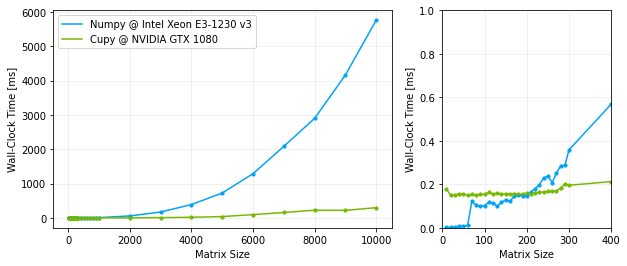

In [36]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})

# 1. plot ----------------------------------------------------
ax1.plot(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", label="Numpy @ Intel Xeon E3-1230 v3")
ax1.scatter(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", s=10)
ax1.plot(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", label="Cupy @ NVIDIA GTX 1080")
ax1.scatter(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", s=10)

#plt.xscale('log')
#plt.yscale('log')

ax1.set_ylabel("Wall-Clock Time [ms]")
ax1.set_xlabel("Matrix Size")


ax1.set_axisbelow(True) # draw grid behind scatter
ax1.grid(c="#ededed")

ax1.legend()

# 2. plot ----------------------------------------------------

ax2.plot(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", label="Numpy @ Intel Xeon E3-1230 v3")
ax2.scatter(df_numpy.iloc[:, 0], df_numpy.iloc[:, 1], color="#00a3f6", s=10)
ax2.plot(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", label="Cupy @ NVIDIA GTX 1080")
ax2.scatter(df_cupy.iloc[:, 0], df_cupy.iloc[:, 1], color="#76b900", s=10)

#plt.xscale('log')
#plt.yscale('log')
ax2.set_ylim(0, 1)
ax2.set_xlim(0, 400)

ax2.set_ylabel("Wall-Clock Time [ms]")
ax2.set_xlabel("Matrix Size")

#txt = fig.text(.5, 5, desc_sizes, ha='center')
#txt.set_transform(trans)

ax2.set_axisbelow(True) # draw grid behind scatter
ax2.grid(c="#ededed")

#ax2.legend()

plt.savefig("plots/plot_benchmark-sizes-report.jpg", dpi=200, bbox_inches='tight')
plt.show()